# Step 4 - Creating and training a model
### Objective
Create a model, compile it, and run the training with the images saved in the 'TrainValTest Data' folder.

### Requirements
The program 'Step 3' has been run. On completion of the program ('Step 3'), the 'TrainValTest Data' with the subfolders have been created and populated.

### Folder structure

    Data
    |
    ----Input Videos                    ---existing
    |    |
    |    ----Kevin (class 1)            ---existing
    |    |
    |    ----Stuart (class 2)           ---existing
    |
    ----Output Data                     ---existing
    |    |
    |    ----Kevin (class 1)            ---existing
    |    |
    |    ----Stuart (class 2)           ---existing
    |
    ----Processed Data                  ---existing
    |    |
    |    ----Kevin (class 1)            ---existing
    |    |
    |    ----Stuart (class 2)           ---existing
    |    
    ----TrainValTest Data               ---existing
         |
         ----Train                      ---existing
              |
              ----Kevin (class 1)       ---existing
              |
              ----Stuart (class 2)      ---existing
         |
         ----Val                        ---existing
              |
              ----Kevin (class 1)       ---existing
              |
              ----Stuart (class 2)      ---existing
         |
         ----Test                       ---existing
              |
              ----Kevin (class 1)       ---existing
              |
              ----Stuart (class 2)      ---existing

### Output
The saved model will create a folder in which the assests will be stored. The folder/model name is used in loading the model which will be called in the next program for prediction.

In [1]:
#Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

import os
import matplotlib.pyplot as plt

In [ ]:
#Managing the GPU.
#This will take care of most of the 'Out of Memory' issues that rise with using a local GPU.
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config = config)

In [2]:
#Check to see ifthe GPU is available.
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
trainDir = 'Data\TrainValTest Data\Train'
valDir = 'Data\TrainValTest Data\Val'

trainKevinDir = os.path.join(trainDir, 'Kevin')  
trainStuartDir = os.path.join(trainDir, 'Stuart')  
valKevinDir = os.path.join(valDir, 'Kevin')  
valStuartDir = os.path.join(valDir, 'Stuart')  

print ('Kevin training images: %d' %len(os.listdir(trainKevinDir)))
print ('Stuart training images: %d' %len(os.listdir(trainStuartDir)))
print ('Kevin validation images: %d' %len(os.listdir(valKevinDir)))
print ('Stuart validation images: %d' %len(os.listdir(valStuartDir)))
print ('-------------------------')
print ('Total training images: %d' %(len(os.listdir(trainKevinDir))+len(os.listdir(trainStuartDir))))
print ('Total validation images: %d' %(len(os.listdir(valKevinDir))+len(os.listdir(valStuartDir))))

total_train = len(os.listdir(trainKevinDir))+len(os.listdir(trainStuartDir))
total_val = len(os.listdir(valKevinDir))+len(os.listdir(valStuartDir))

Kevin training images: 334
Stuart training images: 334
Kevin validation images: 167
Stuart validation images: 167
-------------------------
Total training images: 668
Total validation images: 334


In [4]:
batch_size = 8
epochs = 10
learning_rate = 0.0000012
IMG_HEIGHT = 200
IMG_WIDTH = 300

reqVAcc = 0.9
reqDiff = 0.05

In [5]:
trainIDG = ImageDataGenerator(rescale=1./255,
#                              rotation_range=45,
#                              width_shift_range=.15,
#                              height_shift_range=.15,
#                              horizontal_flip=True,
                              zoom_range=0.5) 

valIDG = ImageDataGenerator(rescale=1./255) 

In [6]:
train_data_gen = trainIDG.flow_from_directory(batch_size=batch_size,
                                              directory=trainDir,
                                              shuffle=True,
                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                              class_mode='binary')

Found 668 images belonging to 2 classes.


In [7]:
val_data_gen = valIDG.flow_from_directory(batch_size=batch_size,
                                          directory=valDir,
                                          shuffle=True,
                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                          class_mode='binary')

Found 334 images belonging to 2 classes.


In [9]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),

    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(256, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Flatten(),
    
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

In [10]:
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate #,
#                                 beta_1=0.9, 
#                                 beta_2=0.999, 
#                                 epsilon=1e-07, 
#                                 amsgrad=False,
)

In [11]:
model.compile(optimizer=adam,
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
def run_training():
    return model.fit(train_data_gen,
                     epochs           = epochs,
                     batch_size       = batch_size, 
                     validation_data  = val_data_gen)

In [14]:
print ('Step: 0')
history = run_training()

exitCondition = True
step = 1
while (exitCondition):
    lastTAcc = history.history['accuracy'][-1]
    lastVAcc = history.history['val_accuracy'][-1]
    print ('Difference: ', abs(lastVAcc-lastTAcc))
    print ('Validation Acc:', lastVAcc)
    
    if (lastVAcc < reqVAcc):
        print ('Step:', step)
        history = run_training()
        step += 1
    elif (lastVAcc > reqVAcc) and (abs(lastVAcc-lastTAcc) > reqDiff):
        print ('Step:', step)
        history = run_training()
        step += 1
        epochs = 5
    else:
        exitCondition = False

Epoch 1/10
84/84 [==============================] - 14s 170ms/step - loss: 0.7200 - accuracy: 0.5000 - val_loss: 0.7161 - val_accuracy: 0.5000
Epoch 2/10
84/84 [==============================] - 13s 153ms/step - loss: 0.7134 - accuracy: 0.5000 - val_loss: 0.7099 - val_accuracy: 0.5000
Epoch 3/10
84/84 [==============================] - 13s 158ms/step - loss: 0.7079 - accuracy: 0.5000 - val_loss: 0.7042 - val_accuracy: 0.5000
Epoch 4/10
84/84 [==============================] - 13s 157ms/step - loss: 0.7029 - accuracy: 0.5000 - val_loss: 0.6997 - val_accuracy: 0.5000
Epoch 5/10
84/84 [==============================] - 13s 153ms/step - loss: 0.6987 - accuracy: 0.5000 - val_loss: 0.6959 - val_accuracy: 0.5000
Epoch 6/10
84/84 [==============================] - 13s 155ms/step - loss: 0.6955 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 7/10
84/84 [==============================] - 13s 155ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6915 - val_accuracy: 0.5000

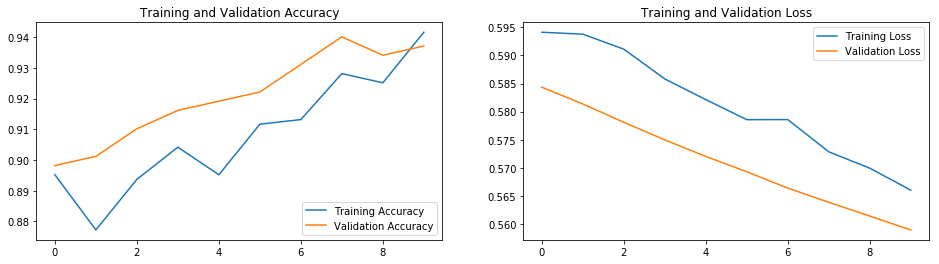

In [15]:
#Show grpahs for the last run
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
model.save('MinionsModel-20200603')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: MinionsModel-20200603\assets
